# Unitary of qlasskit function


QlassF<f>(a:bool, b:bool) -> bool:
	_ret = a ^ ~b



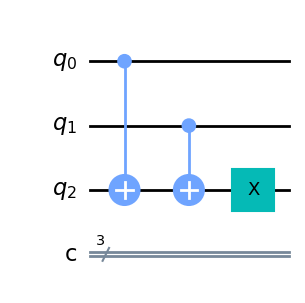

In [19]:
from qiskit import Aer, QuantumCircuit, transpile, execute
from qiskit.visualization import array_to_latex
from qlasskit import qlassf

@qlassf
def f(a: bool, b: bool) -> bool:
    return a ^ (not b)

print(f"\n{f}\n")

qc = QuantumCircuit(f.num_qubits, f.num_qubits)
qc.append(f.gate(), f.qubits)

qc.decompose().draw('mpl')


In [20]:
simulator = Aer.get_backend('unitary_simulator')
job = execute(qc, simulator, shots=8192)
result = job.result()
array_to_latex(result.get_unitary(qc,3), max_size=16)


<IPython.core.display.Latex object>